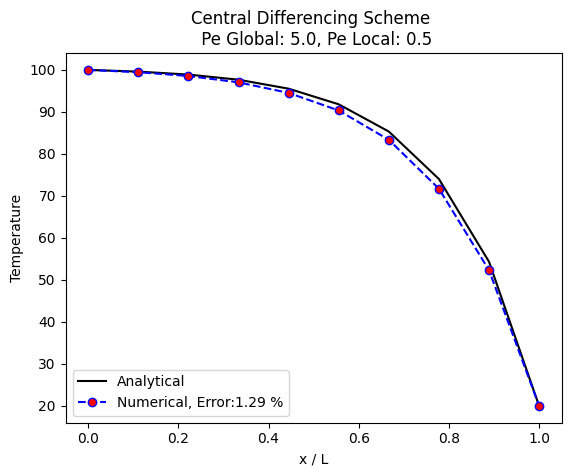

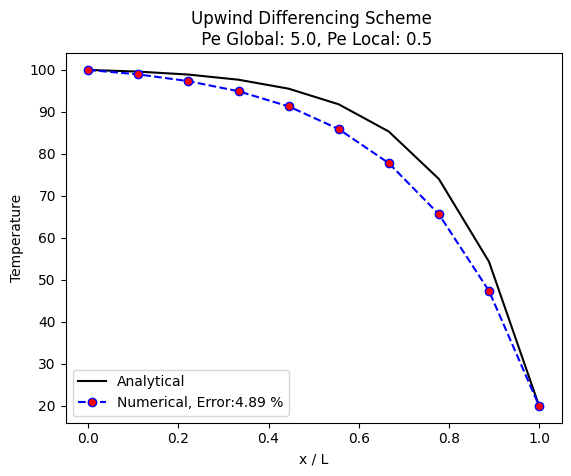

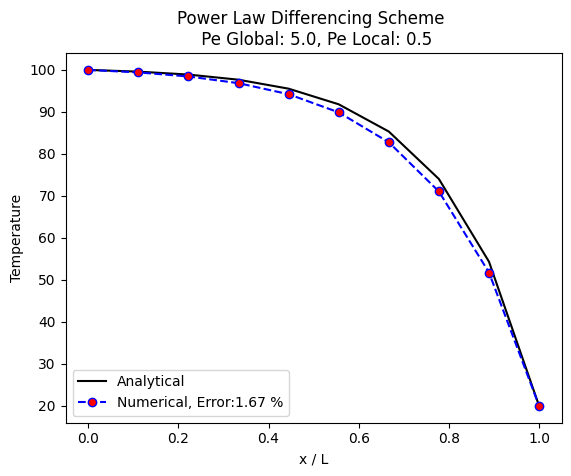

[None, None, None]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm_and_tools import analytical, plotting, error_calc
from schemes import *

def solve():
    # Domain setup
    length = 1.0 # m
    cell_count = 10
    delta_x = length / cell_count
    x_grid = np.linspace(0, length, cell_count)

    # Fluid and Flow Properties setup
    gamma_T = 0.2 # diffusivity, between 0.1 and 1.0
    density = 1 # kg/m^3, value between 0.1 and 1.0
    Temp = np.full(cell_count,20.0) # deg C, T field initialisation
    vel = 1.0 # m/s

    # Equations Setup
    Pe_global = round((density * vel * length / gamma_T),3)
    Pe_local = round((density * vel * delta_x / gamma_T),3)
    
    T_cds = cds(cell_count, gamma_T, delta_x, density, vel, Temp)
    T_uds = uds(cell_count, gamma_T, delta_x, density, vel, Temp)
    T_pds = pds(cell_count, gamma_T, delta_x, density, vel, Temp, Pe_local)
    T_analytical = analytical(x_grid, length, Pe_global)

    # Errors
    Error_cds = error_calc(cell_count, T_analytical, T_cds)
    Error_uds = error_calc(cell_count, T_analytical, T_uds)
    Error_pds = error_calc(cell_count, T_analytical, T_pds)

    result_lists = [T_cds, T_uds, T_pds]
    result_names = ["Central Differencing Scheme",
                    "Upwind Differencing Scheme",
                    "Power Law Differencing Scheme",]
    error_vals = [Error_cds, Error_uds, Error_pds]

    figures = []

    for i, j, k in zip(result_lists, result_names, error_vals):
        figure = plotting(x_grid, i, T_analytical, j, k, Pe_global, Pe_local)
        figures.append(figure)
        
    return figures

solve()